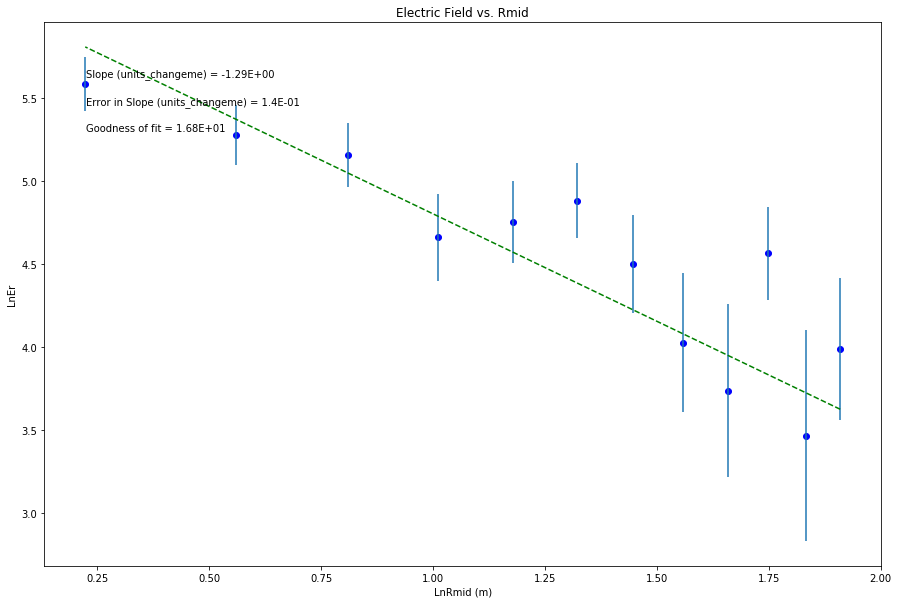

In [2]:
#Physics 216
#Electric Fields and Electric potential
#Riley McVey
#Feb, 20 2019
#-------------------------------------------#
from __future__ import division

%matplotlib inline
#Import packages and libraries needed and give them shortcut names
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
Lnrmid = np.array([1.909543,1.832581,1.7492,1.658228,1.558145,1.446919,1.321756,1.178655,1.011601,0.81093,0.559616,0.223144]) #m
lnEr1 = np.array([3.988984,3.465736,4.564348,3.73767,4.025352,4.49981,4.882802,4.75359,4.663439,5.159055,5.278115,5.583496]) #what are units?
lner2= np.array([4.382027,3.688879,4.521789,3.401197,3.988984,4.521789,4.543295,4.430817,5.480639,5.267858,2.079442,5.308268])
lner3= np.array([3.091042,4.624973,2.772589,4.330733,4.477337,4.127134,4.356709,4.867534,5.288267,3.951244,5.247024,5.568345])
#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
errLnEr = np.array([0.4301269616,0.6346445337,0.2807593068,0.5196845743,0.4184533481,0.293964941,0.2270798937,0.2466617701,0.2620687508,0.1940996848,0.1831568696,0.1623560821])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = Lnrmid   #this should be the array you want to plot on the x axis
y = lnEr1
dy = errLnEr  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('LnRmid (m)')
plt.ylabel('LnEr')
plt.title('Electric Field vs. Rmid')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()